In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data= pd.read_csv('/content/Fake_News.csv')
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


#Step 1: Data Cleaning

In [ ]:

# Rename the unnamed column to 'id'
data = data.rename(columns={'Unnamed: 0': 'id'})
data.head(100)

,id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
95,8290,The Mandela Effect was made by one overlooked ...,"link There is simply no more denying, for mill...",FAKE
96,6227,CNN: One voter can make a difference by voting...,Channel list \nFollowing hurricane Matthew's f...,FAKE
97,3255,Give Social Security recipients a CEO-style raise,(CNN) On Veterans Day we recognize and honor t...,REAL
98,3177,"Fireworks erupt between Trump and Bush, Rubio ...",Sparks flew at the toughest and liveliest GOP ...,REAL


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      6335 non-null   int64 
 1   title   6335 non-null   object
 2   text    6335 non-null   object
 3   label   6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [ ]:

# Check for null values
null_counts = data.isnull().sum()
print(null_counts)

id       0
title    0
text     0
label    0
dtype: int64


In [ ]:
duplicates = data.duplicated()

# Print the boolean Series to identify duplicates
print(duplicates)



0       False
1       False
2       False
3       False
4       False
        ...  
6330    False
6331    False
6332    False
6333    False
6334    False
Length: 6335, dtype: bool


#Step 2: Exploratory Data Analysis (EDA)

Distribution of labels:
label
REAL    3171
FAKE    3164
Name: count, dtype: int64


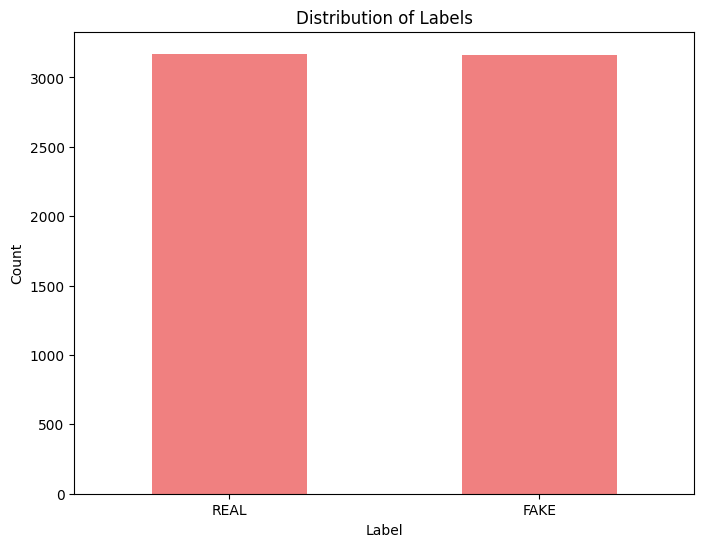

In [ ]:
# Check distribution of labels
label_counts = data['label'].value_counts()
print("Distribution of labels:")
print(label_counts)
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color='lightcoral')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.show()


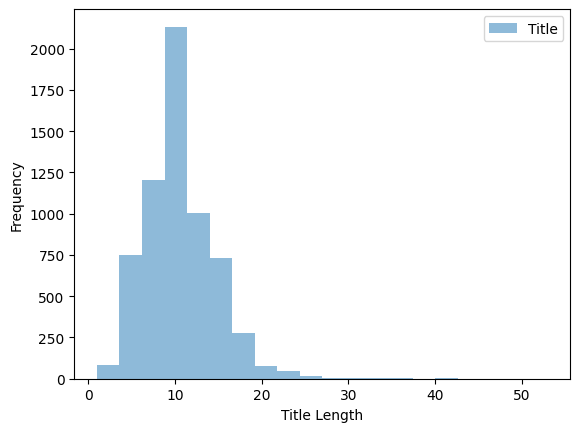

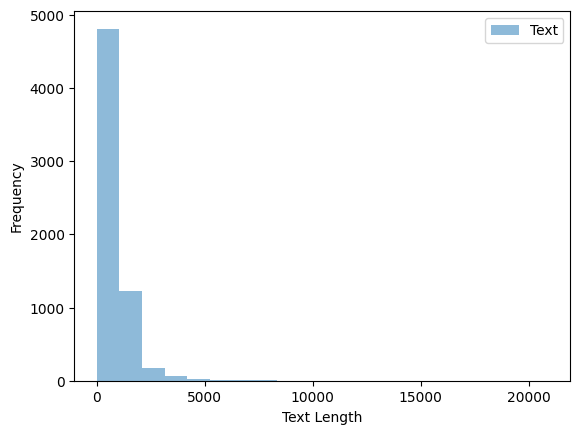

In [ ]:
# Analyze text length
data['title_length'] = data['title'].apply(lambda x: len(x.split()))
data['text_length'] = data['text'].apply(lambda x: len(x.split()))

# Visualize text length distribution

plt.hist(data['title_length'], bins=20, alpha=0.5, label='Title')
plt.xlabel('Title Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()


plt.hist(data['text_length'], bins=20, alpha=0.5, label='Text')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()



In [ ]:
# Word frequency analysis (example)
from collections import Counter
words = ' '.join(data['text']).split()
word_freq = Counter(words)

print("Most common words:")
print(word_freq.most_common(10))

Most common words:
[('the', 258287), ('to', 136726), ('of', 128321), ('and', 111419), ('a', 102501), ('in', 88519), ('that', 64272), ('is', 51951), ('for', 43472), ('on', 37624)]


# Step 3: Data Preprocessing

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')

# Combine title and text columns
data['combined_text'] = data['title'] + " " + data['text']

# Preprocessing
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Tokenization and lowercase
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]  # Remove stopwords and non-alphabetic tokens
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]  # Stemming
    return " ".join(stemmed_tokens)

data['processed_text'] = data['combined_text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
print(data['processed_text'])

0       smell hillari fear daniel greenfield shillman ...
1       watch exact moment paul ryan commit polit suic...
2       kerri go pari gestur sympathi secretari state ...
3       berni support twitter erupt anger dnc tri warn...
4       battl new york primari matter primari day new ...
                              ...                        
6330    state depart say ca find email clinton special...
6331    p pb stand plutocrat pentagon p pb stand pluto...
6332    protest tool oligarchi inform protest tool oli...
6333    ethiopia obama seek progress peac secur east a...
6334    jeb bush suddenli attack trump matter jeb bush...
Name: processed_text, Length: 6335, dtype: object


#Step 4: Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Feature extraction
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(data['processed_text'])
y = data['label'].map({'FAKE': 0, 'REAL': 1})

In [ ]:
tfidf_vectorizer.get_feature_names_out()[:20]

array(['aaron', 'abandon', 'abc', 'abdeslam', 'abdullah', 'abedin',
       'abid', 'abil', 'abl', 'aboard', 'abolish', 'aborigin', 'abort',
       'abraham', 'abroad', 'absenc', 'absent', 'absente', 'absolut',
       'absorb'], dtype=object)

In [ ]:
tfidf_vectorizer.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 1),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

#Step 5: ML Models

In [ ]:
from sklearn.model_selection import train_test_split
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Train a Logistic Regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

# Predictions
y_pred = logistic_regression_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9139700078926598


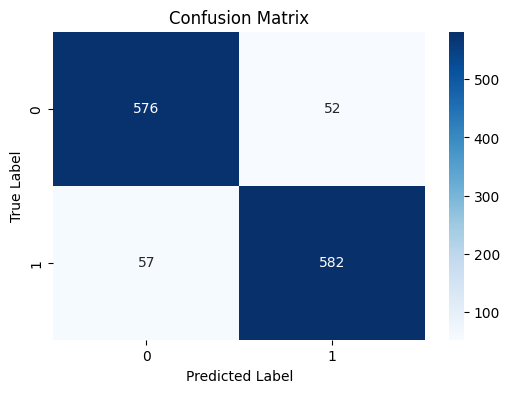

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=logistic_regression_model.classes_, yticklabels=logistic_regression_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)

Accuracy: 0.8855564325177585


In [ ]:
from sklearn.svm import SVC
# Initialize SVM classifier
svm_classifier = SVC(kernel='linear')  # Linear kernel for linear classification

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Predictions
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.936069455406472


0.9360714890902385


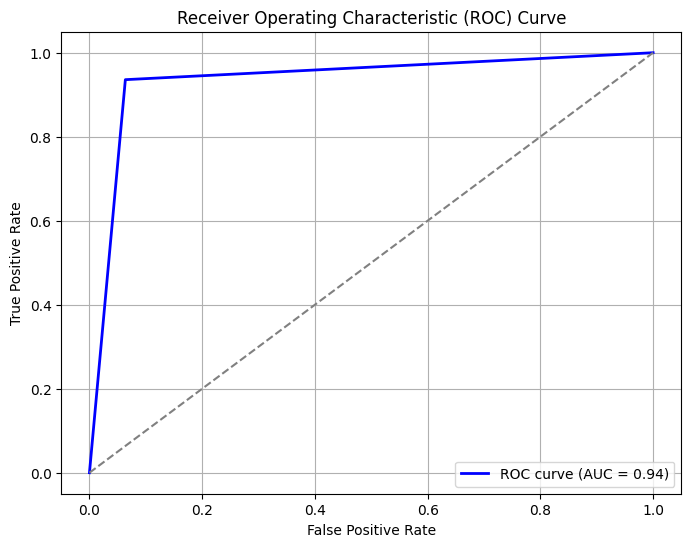

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate AUC score
auc = roc_auc_score(y_test, y_pred)
print(auc)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()